In [1]:
# Iris Classification — Step-by-Step Guide

# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

# 2) Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
class_names = iris.target_names

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Classes:", list(class_names))
X.head()


Shape of X: (150, 4)
Shape of y: (150,)
Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


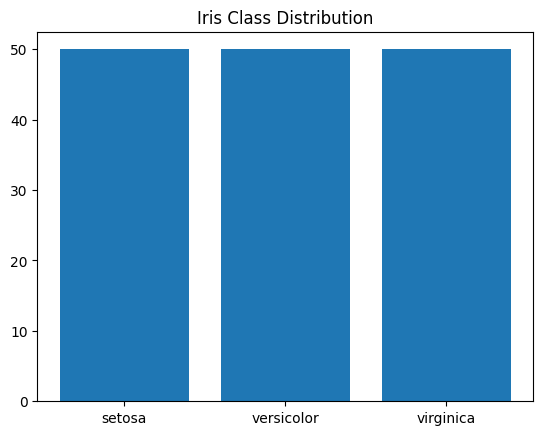

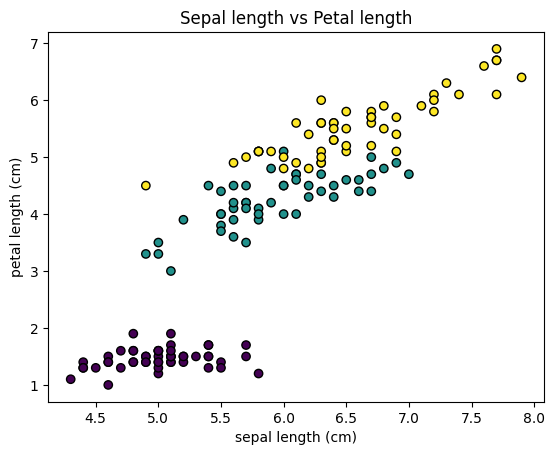

In [2]:
# 3) Quick EDA
print("Class distribution:")
print(y.value_counts().sort_index().rename(index=dict(enumerate(class_names))))

# Plot class distribution
counts = y.value_counts().sort_index()
plt.bar(range(len(counts)), counts.values, tick_label=class_names)
plt.title("Iris Class Distribution")
plt.show()

# Simple scatter plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=y, edgecolors="k")
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[2])
plt.title("Sepal length vs Petal length")
plt.show()


In [3]:
# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (120, 4) (120,)
Test shape: (30, 4) (30,)


Baseline Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



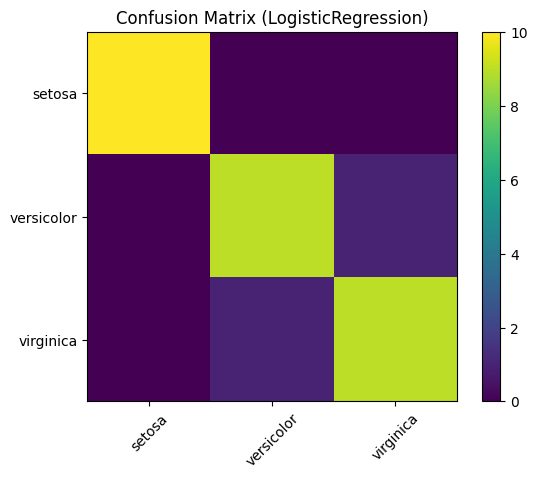

In [4]:
# 5) Baseline model (Logistic Regression)
baseline_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

baseline_pipe.fit(X_train, y_train)
y_pred = baseline_pipe.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (LogisticRegression)")
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.show()


In [7]:
# 7) Hyperparameter tuning with GridSearchCV (SVC example)

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc_pipe = Pipeline([("scaler", StandardScaler()), ("clf", SVC())])

param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ["scale", 0.1, 0.01],
    "clf__kernel": ["rbf"]
}

grid = GridSearchCV(svc_pipe, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
print("Test accuracy:", grid.best_estimator_.score(X_test, y_test))


Best params: {'clf__C': 1, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
Best CV accuracy: 0.975
Test accuracy: 0.9666666666666667


In [8]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc_pipe = Pipeline([("scaler", StandardScaler()), ("clf", SVC())])

param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ["scale", 0.1, 0.01],
    "clf__kernel": ["rbf"]
}

grid = GridSearchCV(svc_pipe, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
print("Test accuracy:", grid.best_estimator_.score(X_test, y_test))


Best params: {'clf__C': 1, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
Best CV accuracy: 0.975
Test accuracy: 0.9666666666666667


In [9]:
# 8) Save the model + predict on new sample
best_model = grid.best_estimator_   # <-- works only if grid is already defined
joblib.dump(best_model, "iris_best_model.joblib")

new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example: setosa
pred_idx = best_model.predict(new_sample)[0]
print("Predicted class:", class_names[pred_idx])


Predicted class: setosa


C:\Users\jaida\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
